In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv(f"{path}/DailyDelhiClimateTrain.csv")
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
print(df.columns)

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


<Figure size 1200x600 with 0 Axes>

# Question 1

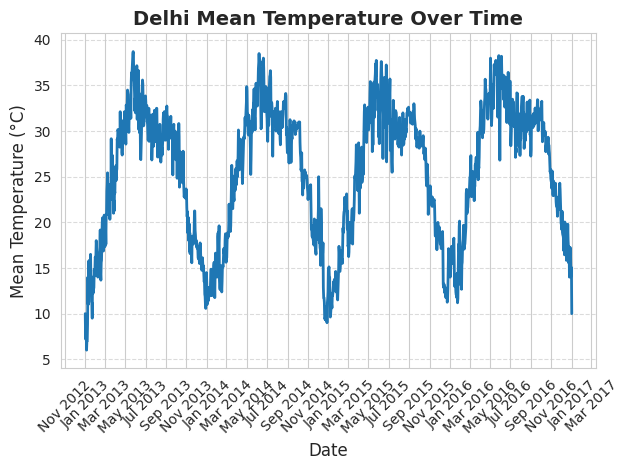

In [ ]:
plt.plot(df['date'], df['meantemp'], color='#1f77b4', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.title('Delhi Mean Temperature Over Time', fontsize=14, fontweight='bold')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
y_min = df['meantemp'].min() - 2
y_max = df['meantemp'].max() + 2
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Question 2

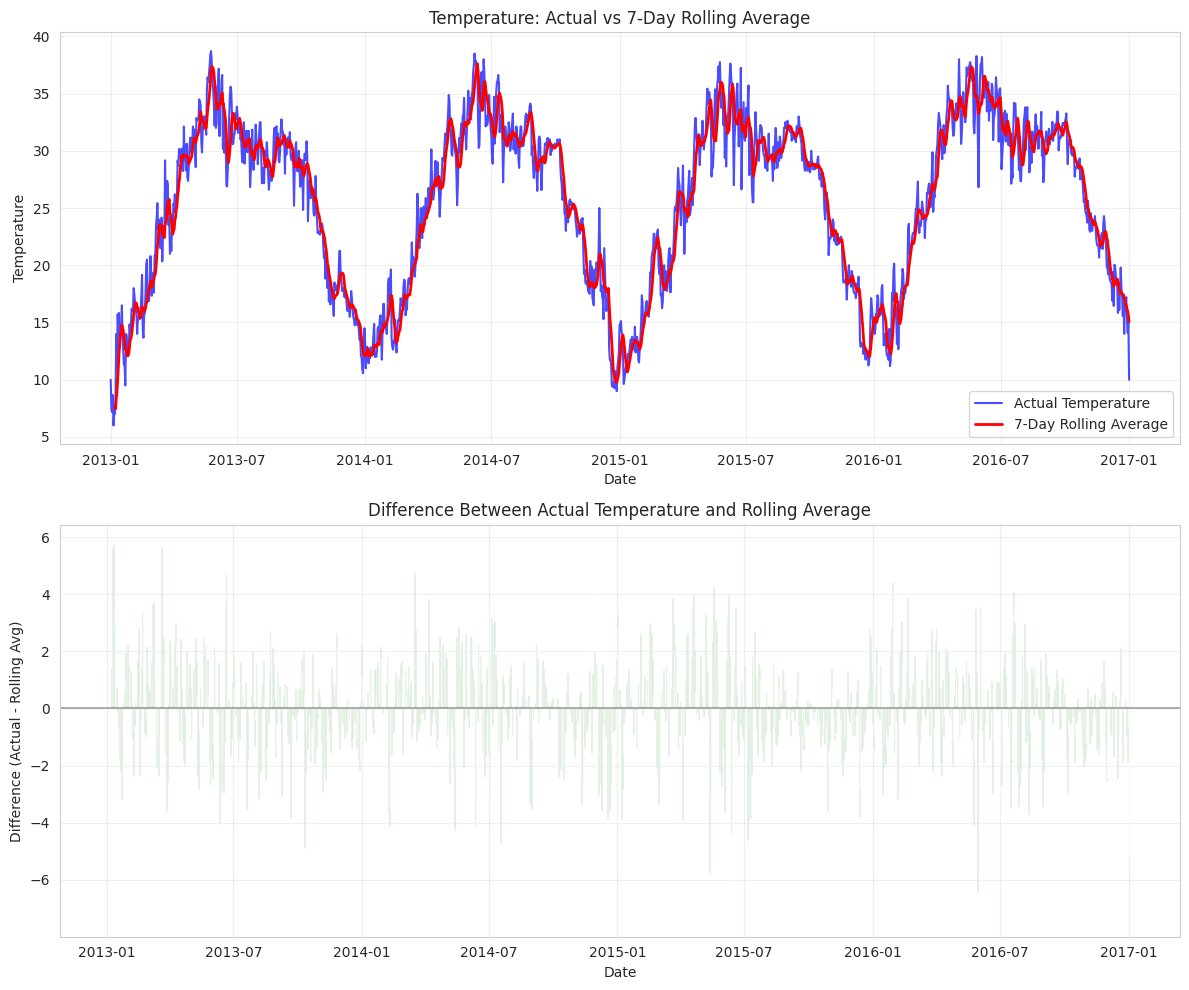

Numerical Comparison Summary:
--------------------------------------------------
Average absolute difference: 1.34
Maximum positive difference: 5.78 (actual > average)
Maximum negative difference: -7.34 (actual < average)
Standard deviation of differences: 1.73
--------------------------------------------------

Sample of data (first 10 rows with non-NaN rolling averages):
         date   meantemp  temp_7day_avg  temp_difference
6  2013-01-07   7.000000       7.604762        -0.604762
7  2013-01-08   8.857143       7.441497         1.415646
8  2013-01-09  14.000000       8.384354         5.615646
9  2013-01-10  11.000000       8.931973         2.068027
10 2013-01-11  15.714286       9.938776         5.775510
11 2013-01-12  14.000000      11.081633         2.918367
12 2013-01-13  15.833333      12.343537         3.489796
13 2013-01-14  12.833333      13.176871        -0.343537
14 2013-01-15  14.714286      14.013605         0.700680
15 2013-01-16  13.833333      13.989796        -0.1564

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate 7-day rolling average for temperature
df['temp_7day_avg'] = df['meantemp'].rolling(window=7).mean()

# Calculate the difference between actual and smoothed values
df['temp_difference'] = df['meantemp'] - df['temp_7day_avg']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Original temperature vs rolling average
ax1.plot(df['date'], df['meantemp'], label='Actual Temperature', color='blue', alpha=0.7)
ax1.plot(df['date'], df['temp_7day_avg'], label='7-Day Rolling Average', color='red', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature: Actual vs 7-Day Rolling Average')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Difference between actual and rolling average
ax2.bar(df['date'], df['temp_difference'], color='green', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.set_xlabel('Date')
ax2.set_ylabel('Difference (Actual - Rolling Avg)')
ax2.set_title('Difference Between Actual Temperature and Rolling Average')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical comparison summary
print("Numerical Comparison Summary:")
print("-" * 50)
print(f"Average absolute difference: {df['temp_difference'].abs().mean():.2f}")
print(f"Maximum positive difference: {df['temp_difference'].max():.2f} (actual > average)")
print(f"Maximum negative difference: {df['temp_difference'].min():.2f} (actual < average)")
print(f"Standard deviation of differences: {df['temp_difference'].std():.2f}")
print("-" * 50)
print("\nSample of data (first 10 rows with non-NaN rolling averages):")
print(df[['date', 'meantemp', 'temp_7day_avg', 'temp_difference']].dropna().head(10))

# Question 3

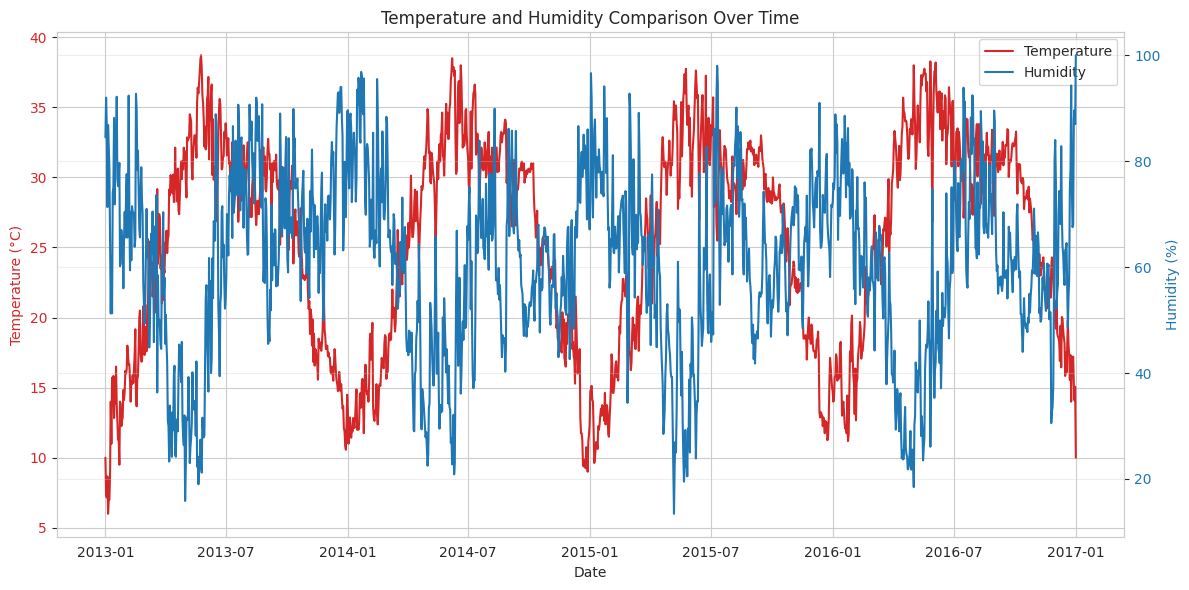

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(df['date'], df['meantemp'], color=color, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)
ax2.plot(df['date'], df['humidity'], color=color, label='Humidity')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Temperature and Humidity Comparison Over Time')
fig.tight_layout()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True, alpha=0.3)
plt.show()

# Question 4

<ipython-input-57-ddaae592c0cf>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df[df['month_name'] == month]['meantemp'] for month in months_order],
<ipython-input-57-ddaae592c0cf>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([df[df['month_name'] == month]['humidity'] for month in months_order],


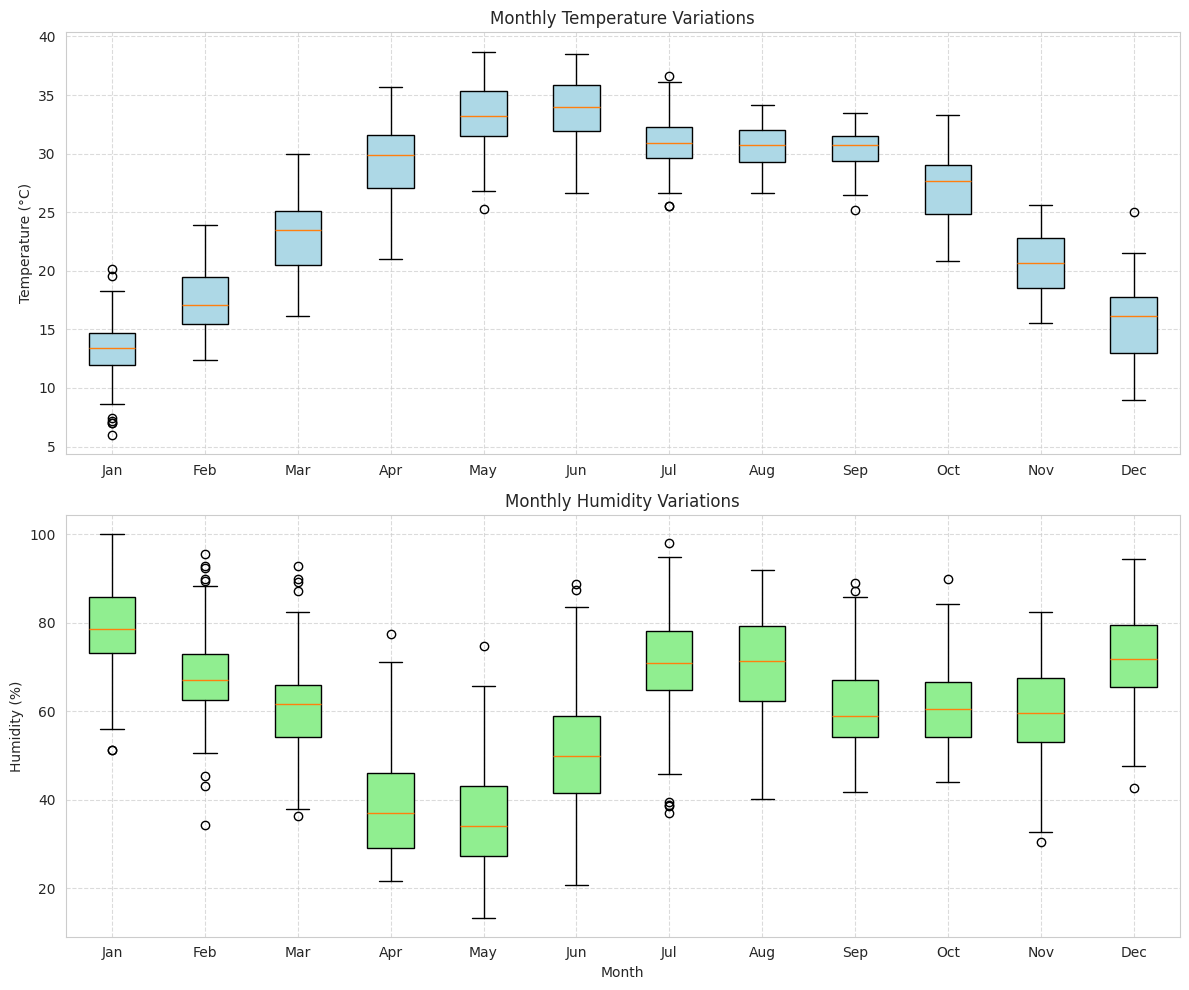

Months with Extreme Weather Conditions:
--------------------------------------------------
Temperature Extremes:
Coldest month: Jan (median: 13.4°C)
Hottest month: Jun (median: 33.9°C)

Humidity Extremes:
Least humid month: May (median: 34.1%)
Most humid month: Jan (median: 78.6%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns_palette = plt.cm.viridis(np.linspace(0, 1, 12))

ax1.boxplot([df[df['month_name'] == month]['meantemp'] for month in months_order],
            labels=months_order,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Monthly Temperature Variations')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.boxplot([df[df['month_name'] == month]['humidity'] for month in months_order],
            labels=months_order,
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
ax2.set_xlabel('Month')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Monthly Humidity Variations')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Months with Extreme Weather Conditions:")
print("-" * 50)

monthly_temp_stats = df.groupby('month_name')['meantemp'].agg(['median', 'min', 'max'])
hottest_month = monthly_temp_stats['median'].idxmax()
coldest_month = monthly_temp_stats['median'].idxmin()

print(f"Temperature Extremes:")
print(f"Coldest month: {coldest_month} (median: {monthly_temp_stats.loc[coldest_month, 'median']:.1f}°C)")
print(f"Hottest month: {hottest_month} (median: {monthly_temp_stats.loc[hottest_month, 'median']:.1f}°C)")

monthly_humidity_stats = df.groupby('month_name')['humidity'].agg(['median', 'min', 'max'])
most_humid_month = monthly_humidity_stats['median'].idxmax()
least_humid_month = monthly_humidity_stats['median'].idxmin()

print(f"\nHumidity Extremes:")
print(f"Least humid month: {least_humid_month} (median: {monthly_humidity_stats.loc[least_humid_month, 'median']:.1f}%)")
print(f"Most humid month: {most_humid_month} (median: {monthly_humidity_stats.loc[most_humid_month, 'median']:.1f}%)")

# Question 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def find_iqr_anomalies(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return anomalies, lower_bound, upper_bound

def find_zscore_anomalies(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    anomalies = data[z_scores > threshold]
    return anomalies

temp_iqr_anomalies, temp_lower, temp_upper = find_iqr_anomalies(df, 'meantemp')

humid_zscore_anomalies = find_zscore_anomalies(df, 'humidity')


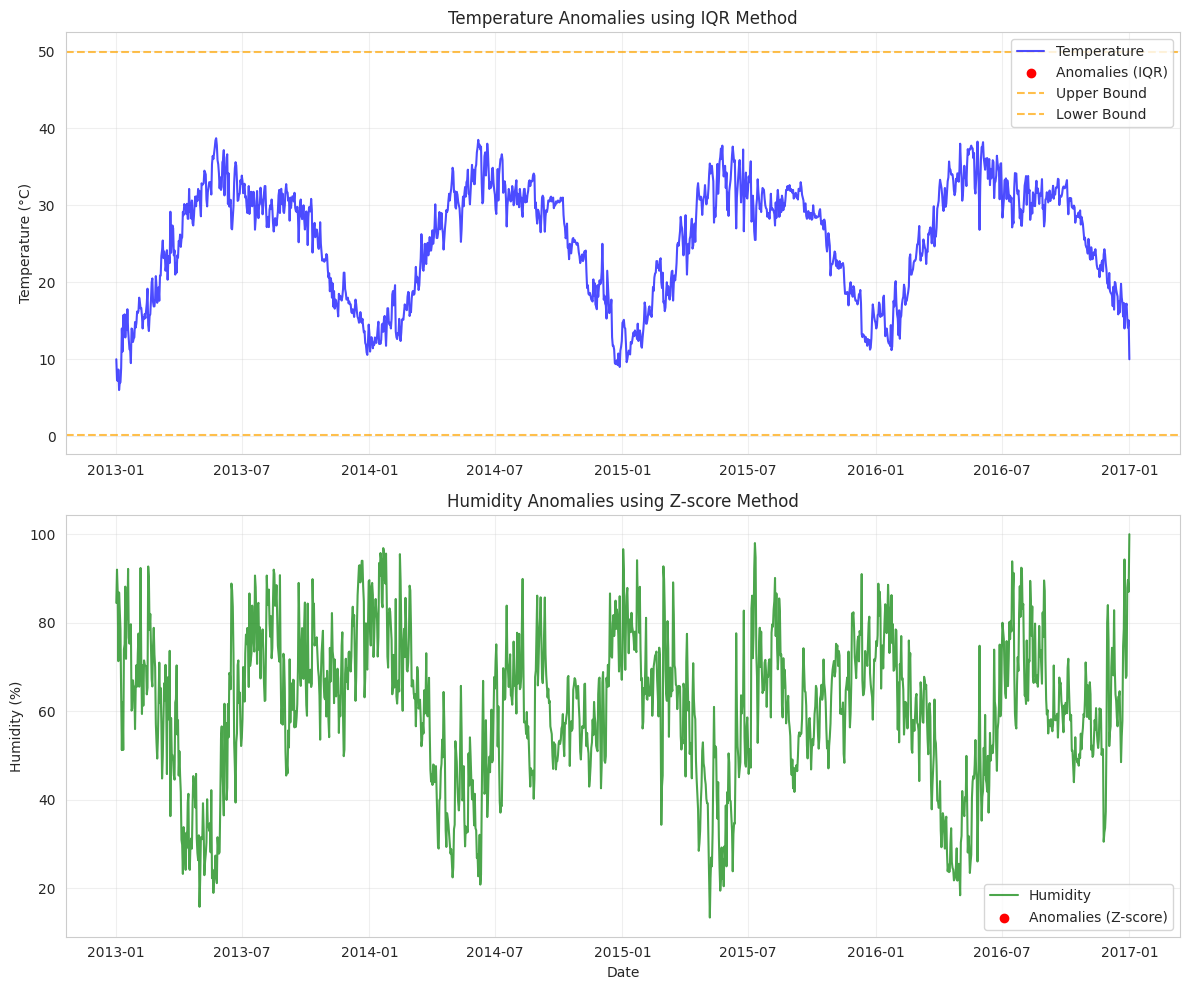

Temperature Anomalies (IQR Method):
------------------------------------------------------------
No temperature anomalies detected

Humidity Anomalies (Z-score Method):
------------------------------------------------------------
No humidity anomalies detected


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(df['date'], df['meantemp'], color='blue', alpha=0.7, label='Temperature')
ax1.scatter(temp_iqr_anomalies['date'], temp_iqr_anomalies['meantemp'], color='red', label='Anomalies (IQR)')
ax1.axhline(y=temp_upper, color='orange', linestyle='--', alpha=0.7, label='Upper Bound')
ax1.axhline(y=temp_lower, color='orange', linestyle='--', alpha=0.7, label='Lower Bound')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature Anomalies using IQR Method')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(df['date'], df['humidity'], color='green', alpha=0.7, label='Humidity')
ax2.scatter(humid_zscore_anomalies['date'], humid_zscore_anomalies['humidity'], color='red', label='Anomalies (Z-score)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Humidity Anomalies using Z-score Method')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Temperature Anomalies (IQR Method):")
print("-" * 60)
if len(temp_iqr_anomalies) > 0:
    for idx, row in temp_iqr_anomalies.iterrows():
        print(f"Date: {row['date'].strftime('%Y-%m-%d')}, Temperature: {row['meantemp']:.1f}°C")
else:
    print("No temperature anomalies detected")

print("\nHumidity Anomalies (Z-score Method):")
print("-" * 60)
if len(humid_zscore_anomalies) > 0:
    for idx, row in humid_zscore_anomalies.iterrows():
        print(f"Date: {row['date'].strftime('%Y-%m-%d')}, Humidity: {row['humidity']:.1f}%")
else:
    print("No humidity anomalies detected")